In [28]:
import os
import numpy as np

# Librerias para graficacion (trazado de graficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

Body Fat Prediction Dataset

Conjunto de datos de predicción de grasa corporal


In [29]:
# Leer datos
#Carga de dataset
#data = pd.read_csv('/content/pizza_v1.csv')
data = pd.read_csv('bodyfat.csv')
print(data)
data.info()
#data = np.loadtxt('ejemplo02.txt', delimiter=',')


     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip   
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5  \
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  

Variable objetivo (y):
    "Grasa corporal": Esta sería tu variable objetivo y. Es lo que intentas predecir en función de las otras mediciones.

Variables predictoras (x):
Densidad     Edad    Peso   Altura   Cuello   Pecho  Abdomen   Cadera   Muslo   Rodilla   Tobillo   Biceps   Antebrazo   Munieca

In [30]:
# Extraer la columna "Grasa corporal"
BodyFat   = data['BodyFat']

# Eliminar la columna "Grasa corporal" del DataFrame original
data = data.drop(columns=['BodyFat'])

# Agregar la columna "Grasa corporal" al final del DataFrame
data['BodyFat'] = BodyFat  


In [31]:
# Lectura de Datos división de matrices
#X, y = data[:, :15], data[:,15]
#m = y.size

# Lectura de Datos DataFrame en Pandas
X = data.iloc[:, :14]
y = data.iloc[:, 14]
m = y.size

In [32]:
print(X)
print('*'*25)
print(y)

     Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee   
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3  \
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  
0     21.9    

In [33]:
X.shape

(252, 14)

In [34]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [35]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee   
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3  \
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  
0     21.9    

In [36]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

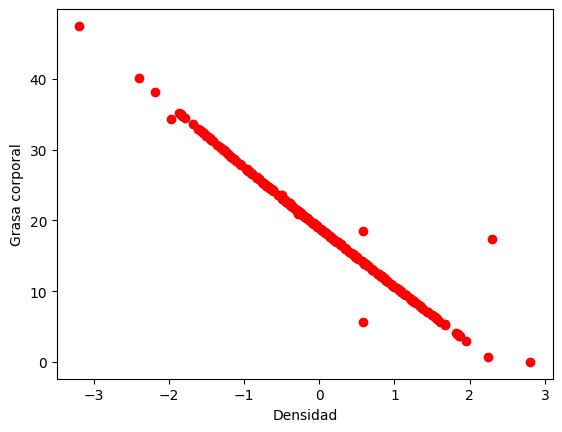

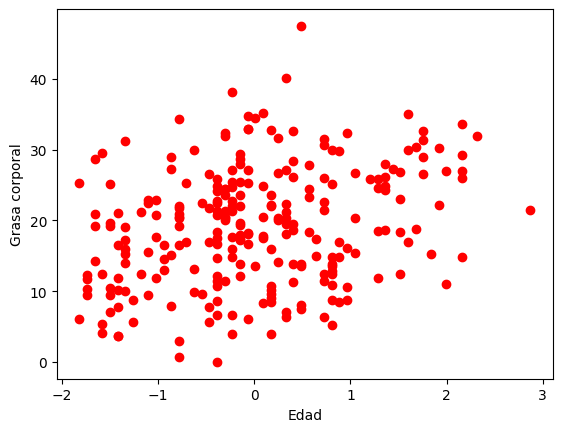

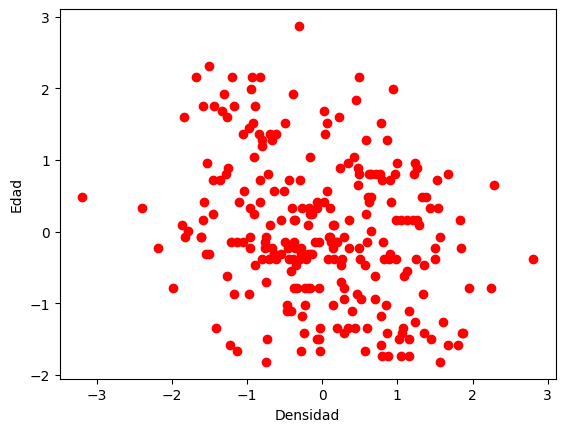

In [37]:
xlabel1 = "Densidad"
xlabel2 = "Edad"
ylabel1 = "Grasa corporal"

graficarDatos(X_norm.iloc[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm.iloc[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 1], xlabel1, xlabel2)

#graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
#graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
#graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


In [38]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [39]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [40]:
theta=np.array([ 1, 0.950, 25, 180, 170, 40, 100, 80, 95, 60, 40, 25, 30, 25, 15])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")
print(len(theta))

con theta:[  1.     0.95  25.   180.   170.    40.   100.    80.    95.    60.
  40.    25.    30.    25.    15.  ] se obtiene un costo de: 230003.84308172343
15


In [41]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    h = np.dot(X, theta)
    gradiente = np.dot(X.T, h - y) / m
    theta = theta - alpha * gradiente
    #theta = theta - (alpha / m) * np.dot(X.T, h - y)
    #theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [19.14992464 -7.18716433  0.24189845 -0.06037244  0.02053138 -0.24928831
  0.20313462  1.28454658 -0.07156477  0.09314049 -0.07440559 -0.04853386
 -0.1029975   0.20633491 -0.23827575]
con un costo de: 0.8269939314747338 


Text(0, 0.5, 'Costo J')

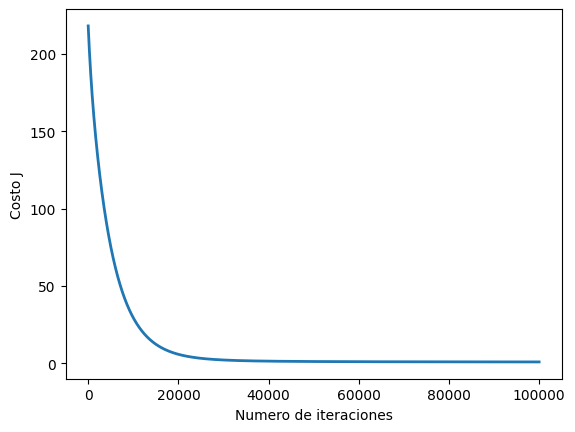

In [42]:
theta = np.zeros(15)
#theta = np.zeros((X_ready.shape[1], 1))  # Inicializar theta como un vector columna
num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y.values, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


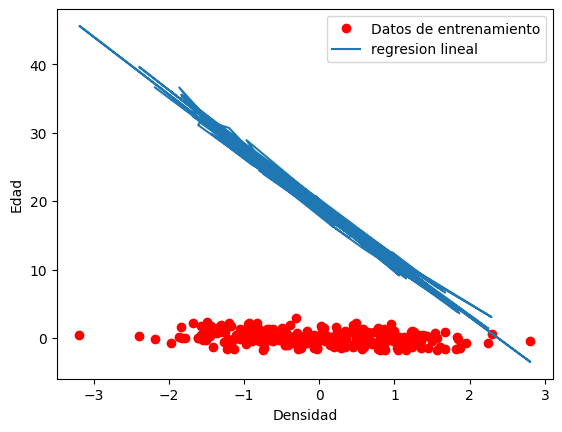

In [43]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [49]:

y_pred = np.dot([ 1, 0.950, 25, 180, 170, 40, 100, 80, 95, 60, 40, 25, 30, 25, 15], theta)
print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(y_pred))


El valor predecido es (usando el descenso por el gradiente): 60.9223


**Utilizando la ecuacion de la normal

In [45]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [46]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [47]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [ 4.50012569e+02 -4.11237849e+02  1.25870031e-02  1.00541597e-02
 -7.98073928e-03 -2.84558253e-02  2.67803354e-02  1.85648834e-02
  1.91660401e-02 -1.67583631e-02 -4.63900523e-03 -8.56761181e-02
 -5.50508219e-02  3.38634347e-02  7.34493756e-03]


In [48]:
X_array = [ 1, 0.950, 25, 180, 170, 40, 100, 80, 95, 60, 40, 25, 30, 25, 15]
price = np.dot(X_array, theta) 

print('usando la ecuación de la normal la grasa corporal de alguien de 26 años es: {:.4f}'.format(price))

usando la ecuación de la normal la grasa corporal de alguien de 26 años es: 60.9223
